In [10]:
# OpenCV 및 OCR모듈 설치 유무 확인
import sys
import cv2
import pytesseract
from PIL import Image

print("python:", sys.version)
print("opencv:", cv2.__version__)
print("pytesseract:", pytesseract.image_to_string(Image.open('images/01.png')))

python: 3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:50:56) 
[Clang 11.1.0 ]
opencv: 4.5.3
pytesseract:  

 



In [11]:
# OpenCV - 이미지 읽기, 쓰기 및 표시하기 (1)
import cv2
def handle_image():
    imagefile = "images/00_XXO.png"
    img = cv2. imread(imagefile, cv2.IMREAD_COLOR)
    
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    
if __name__ == '__main__' :
    handle_image()

In [12]:
# OpenCV - 이미지 읽기, 쓰기 및 표시하기 (2)

import cv2

def handle_image():
    imgfile = 'images/00_XXO.png'
    img = cv2.imread(imgfile, cv2.IMREAD_GRAYSCALE)
    
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)
    cv2.imshow('image', img)
    k = cv2.waitKey(0)
    # wait for ESC key to exit
    if k == 27:
        cv2.destroyAllWindows()
        cv2.waitKey(1)
    # wait for 's' key to save and exit
    elif k == ord('s'):
        cv2.imwrite('images/00_XXO.png', img)
        cv2.destroyAllWindows()
        cv2.waitKey(1)
        
if __name__ == '__main__':
    handle_image()

In [17]:
# OpenCV - 도형 외곽 추출하기 (1)

import cv2

def contour():
    imgfile = 'images/00_XXO.png'
    img = cv2.imread(imgfile)
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    edge = cv2.Canny(imgray, 100, 300)
    contours, hierarchy = cv2.findContours(edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.imshow('edge', edge)
    cv2.drawContours(img, contours, -1, (0, 255, 0), 1)
    cv2.imshow('Contour', img)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

if __name__ == '__main__':
    contour() 

In [19]:
# OpenCV - 도형 외곽 추출하기 - 가우시안 블러 적용(2)

import cv2

def contour():
    imgfile = 'images/00_XXO.png'
    img = cv2.imread(imgfile)
    imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #blur = cv2.GaussianBlur(imgray, ksize=(3,3), sigmaX=0)
    #ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
    
    edge = cv2.Canny(imgray, 100, 300)
    contours, hierarchy = cv2.findContours(edge, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.imshow('edge', edge)
    cv2.drawContours(img, contours, -1, (0, 255, 0), 1)
    #cv2.imshow('Contour', img)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

if __name__ == '__main__':
    contour() 

82
1.1081081081081081
376
104
[221 161 161]
[211  34  34]
[255   0  79]


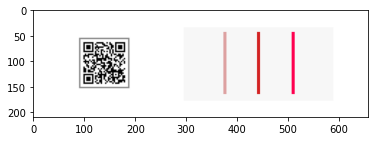

In [81]:
import cv2
import pyzbar.pyzbar as pyzbar
import matplotlib.pyplot as plt


def main():
    imgfile = 'images/sample_01.png'
    img = cv2.imread(imgfile)
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgRGV = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    pointX=0
    pointY=0
    baseLine=0
    
    scaleValue = 1
    splitValue = 1
    baseValue = 74
    baseSpace = 250
    baseSplit = 60
    
    
    plt.imshow(imgRGV)
    
    decoded = pyzbar.decode(imgGray)
#     print(decoded)
    
    for d in decoded:
#         print(d.data.decode('utf-8'))
        pointX = d.rect[0]
        pointY = d.rect[1]
        baseLine = d.rect[2]
    
    print(baseLine)
    scaleValue = baseLine/baseValue
    print(scaleValue)
    splitValue = (int)(baseSplit*scaleValue)
    pointX = pointX + (int)(baseSpace*scaleValue)
    pointY = pointY + (int)(baseLine/2)
    
    print(pointX)
    print(pointY)
    print(imgRGV[pointY,pointX])
    print(imgRGV[pointY,pointX+splitValue])
    print(imgRGV[pointY,pointX+2*splitValue])
    
    
if __name__ == '__main__':
    main()

82
1.1081081081081081
376
104
[  0  69 221]
[  0 214 211]
[  0   0 247]


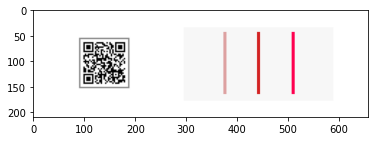

In [85]:
import cv2
import pyzbar.pyzbar as pyzbar
import matplotlib.pyplot as plt


def main():
    imgfile = 'images/sample_01.png'
    img = cv2.imread(imgfile)
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    imgRGV = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    pointX=0
    pointY=0
    baseLine=0
    
    scaleValue = 1
    splitValue = 1
    baseValue = 74
    baseSpace = 250
    baseSplit = 60
    
    
    plt.imshow(imgRGV)
    
    decoded = pyzbar.decode(imgGray)
#     print(decoded)
    
    for d in decoded:
#         print(d.data.decode('utf-8'))
        pointX = d.rect[0]
        pointY = d.rect[1]
        baseLine = d.rect[2]
    
    print(baseLine)
    scaleValue = baseLine/baseValue
    print(scaleValue)
    splitValue = (int)(baseSplit*scaleValue)
    pointX = pointX + (int)(baseSpace*scaleValue)
    pointY = pointY + (int)(baseLine/2)
    
    print(pointX)
    print(pointY)
    print(imgHSV[pointY,pointX])
    print(imgHSV[pointY,pointX+splitValue])
    print(imgHSV[pointY,pointX+3*splitValue])
    
    
if __name__ == '__main__':
    main()

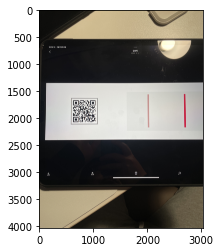

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

def main():
    imgfileURL = "https://172.30.1.16:3000/1643994984019.jpg"
    imageNparray = np.asarray(bytearray(requests.get(imgfileURL, verify=False).content), dtype=np.uint8)
    imageConvert = cv2.imdecode(imageNparray, cv2.IMREAD_COLOR)
#     img = cv2.imread(imageConvert)
    imgRGV = cv2.cvtColor(imageConvert, cv2.COLOR_BGR2RGB)
    plt.imshow(imgRGV)

if __name__ == '__main__':
    main()

https://172.30.1.16:3000/1644000929622.jpg
[Decoded(data=b'http://m.site.naver.com/0SmbZ', type='QRCODE', rect=Rect(left=499, top=1687, width=378, height=371), polygon=[Point(x=499, y=2058), Point(x=877, y=2055), Point(x=877, y=1687), Point(x=503, y=1688)])]
1751
1872
300
True
[2,61,198]
[30,9,221]
[174,130,185]


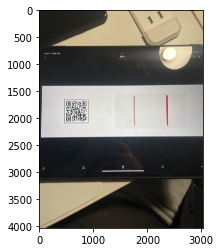

In [45]:
import os
import sys
import cv2
import numpy as np
import requests
import pyzbar.pyzbar as pyzbar
import matplotlib.pyplot as plt
import urllib3

urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)


def main():
    # print(sys.argv[0]) # FileName.py
    # print(sys.argv[1]) # First Value

    # imgfile = 'images/sample_00.png'
    imgfileURL = "https://172.30.1.16:3000/1644000929622.jpg"
    print(imgfileURL)
    
    # os.system("curl " + sys.argv[1] + " > ./images/qrImage.png")   
    # imgfile = 'images/qrImage.png'
    imageNparray = np.asarray(bytearray(requests.get(imgfileURL, verify=False).content), dtype=np.uint8)
    imageConvert = cv2.imdecode(imageNparray, cv2.IMREAD_COLOR)
    # img = cv2.imread(imageConvert)
    imgRGV = cv2.cvtColor(imageConvert, cv2.COLOR_BGR2RGB)
    imgGray = cv2.cvtColor(imageConvert, cv2.COLOR_BGR2GRAY)
    imgHSV = cv2.cvtColor(imageConvert, cv2.COLOR_BGR2HSV)
    
    qrExist=False
    pointX=0
    pointY=0
    baseLine=0
    
    scaleValue = 1
    splitValue = 1
    baseValue = 74
    baseSpace = 250
    baseSplit = 60
    
    decoded = pyzbar.decode(imgGray)
    print(decoded)
    if len(decoded) == 0 :
        # print('no qr-code')
        qrExist = False
    else :
        qrExist = True

    
    for d in decoded:
#         print(d.data.decode('utf-8'))
        pointX = d.rect[0]
        pointY = d.rect[1]
        baseLine = (int)(d.rect[2]+d.rect[3])/2*0.99 
    
    # print(baseLine)
    scaleValue = baseLine/baseValue
    # print(scaleValue)
    splitValue = (int)(baseSplit*scaleValue)
    pointX = pointX + (int)(baseSpace*scaleValue)
    pointY = pointY + (int)(baseLine/2)
    
    print(pointX)
    print(pointY)
    print(splitValue)
    cl0 = imgHSV[pointY,pointX]
    cl1 = imgHSV[pointY,pointX+splitValue]
    cl2 = imgHSV[pointY,pointX+2*splitValue]
    
#     cl0 = imgHSV[pointX,pointY]
#     cl1 = imgHSV[pointX+splitValue,pointY]
#     cl2 = imgHSV[pointX+2*splitValue,pointY]
    
    print(qrExist)
    print('[{0},{1},{2}]'.format(cl0[0],cl0[1],cl0[2]))
    print('[{0},{1},{2}]'.format(cl1[0],cl1[1],cl1[2]))
    print('[{0},{1},{2}]'.format(cl2[0],cl2[1],cl2[2]))
    plt.imshow(imgRGV)
    
    
if __name__ == '__main__':
    main()